In [134]:
import numpy as np
import seaborn as sns
import pandas as pd
mat_size = [2**x for x in range(5,14)]

In [135]:
import pandas as pd
import numpy as np

df = pd.read_csv("/Users/johncarlsson/Desktop/HPC/SrcSkylineR34GTR/results/run4/results.csv")



df.drop('Unnamed: 27',inplace=True, axis=1)
#df.to_excel("results.xlsx", index=False)

In [136]:
import pandas as pd

merged_df= df
# Assume your merged DataFrame is named 'merged_df'
# and the column names are in the row with index 9

# Step 1: Identify the row indices where the column names appear
column_names_row_index = 100

# Step 2: Split the DataFrame based on the identified row indices
separate_dfs = []  # List to store separate DataFrames

start_index = 0
end_index = column_names_row_index

while end_index < len(merged_df):
    df = merged_df.iloc[start_index:end_index].copy()
    separate_dfs.append(df)

    start_index = end_index + 1
    end_index = start_index + column_names_row_index

# Now you have separate DataFrames stored in the 'separate_dfs' list.
# Each DataFrame corresponds to one section of the repeating pattern.

# Example: Printing the first few rows of each separate DataFrame
for i, df in enumerate(separate_dfs):
    print(f"DataFrame {i+1}:")
    df.drop('MMA Cublas Loading',axis=1, inplace=True)
    df.drop('MMA Cublas Computing',axis=1, inplace=True)
    df.drop('MMA Cublas Outputing',axis=1, inplace=True)
    print(df.columns)





DataFrame 1:
Index(['MMA CPU Loading', 'MMA CPU Computing', 'MMA CPU Outputing',
       'MMA CUDA Loading', 'MMA CUDA Computing', 'MMA CUDA Outputing',
       'MMA CUDA Shared Loading', 'MMA CUDA Shared Computing',
       'MMA CUDA Shared Outputing',
       'MMA CUDA Shared Half Rect Tiling 32*64 Loading',
       'MMA CUDA Shared Half Rect Tiling 32*64 Computing',
       'MMA CUDA Shared Half Rect Tiling 32*64 Outputing',
       'MMA CUDA Shared Half Rect Tiling 32*96 Loading',
       'MMA CUDA Shared Half Rect Tiling 32*96 Computing',
       'MMA CUDA Shared Half Rect Tiling 32*96 Outputing',
       'MMA CUDA Shared 16 Tile Loading', 'MMA CUDA Shared 16 Tile Computing',
       'MMA CUDA Shared 16 Tile Outputing',
       'MMA CUDA Shared Halfs 32 Tile Loading',
       'MMA CUDA Shared Halfs 32 Tile Computing',
       'MMA CUDA Shared Halfs 32 Tile Outputing', 'MMA Tensor Loading',
       'MMA Tensor Computing', 'MMA Tensor Outputing'],
      dtype='object')
DataFrame 2:
Index(['MMA CPU

In [137]:
import pandas as pd
dealloc_dfs = []
alloc_dfs = []
for i,df in enumerate(separate_dfs):
    if i %2 == 0:
        alloc_dfs.append(df.astype(float))
    else:
        dealloc_dfs.append(df.astype(float))


print(len(alloc_dfs))


9


In [138]:
# For the dealloc

import pandas as pd
import matplotlib.pyplot as plt


comp = False
dfs = dealloc_dfs
if comp:
    
    comp_columns = list(dfs[0].columns[1::3])

    values = {m:{comp:[] for comp in comp_columns} for m in mat_size}
    for m,df in enumerate(dfs):
        for col in comp_columns:
            print(col)
            values[mat_size[m]][col] = df[col].mean()
            if values[mat_size[m]][col] == -1: 
                values[mat_size[m]][col] = None


else:
    # List of dataframes
    
    # List of matrix sizes and comparison columns 
    comp_columns = dfs[0].columns  # Replace with your list of comparison columns

    # Initialize the values dictionary
    values = {m: {comp: [] for comp in comp_columns} for m in mat_size}

    # Compute the means and update the values dictionary
    methods = ['CPU', 'CUDA', 'CUDA Shared', 'CUDA Shared Half Rect Tiling 32*64', 'MMA CUDA Shared Half Rect Tiling 32*96', \
               'MMA CUDA Shared 16 Tile','MMA CUDA Shared Halfs 32', 'MMA Tensor Computing']

    for m, df in enumerate(dfs):
        for col in comp_columns:
            mean_value = df[col].mean()
            if mean_value == -1:
                mean_value = None
            values[mat_size[m]][col] = mean_value

    dfs = pd.DataFrame(values)

    tot_time = {m:{m:0 for m in methods} for m in mat_size}

    for size in dfs.columns:
        for i,k in enumerate(methods):
            tot_time[size][k] = dfs[size].iloc[i*3:i*3+2].sum()


#print(tot_time)

In [139]:
### plotting
import seaborn as sns
import matplotlib.pyplot as plt


data = tot_time
sizes = list(data.keys())
methods = list(data[sizes[0]].keys())


method_values = {method: [data[size][method] for size in sizes if data[size][method]] for method in methods}


/Users/johncarlsson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/johncarlsson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/johncarlsson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

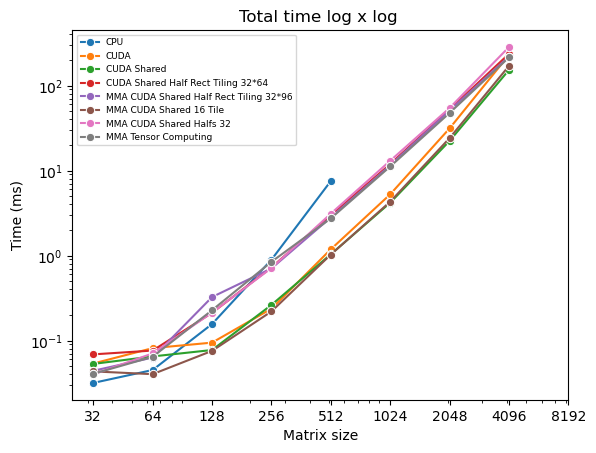

In [140]:
for method, values in method_values.items():
    if len(sizes) > len(values):
        values += [None] * (len(sizes) - len(values))
    elif len(values) > len(sizes):
        sizes += [None] * (len(values) - len(sizes))
    g = sns.lineplot(sizes, values, marker='o', label=method)




legend = plt.legend( fontsize = 6.5)
g.set(xscale="log", yscale="log")

g.set_xticks(mat_size) # <--- set the ticks first
g.set_xticklabels(mat_size)
g.set_ylabel('Time (ms)')
g.set_xlabel('Matrix size')
g.set_title('Total time log x log ')



plt.savefig('/Users/johncarlsson/Desktop/HPC/HPC-Project-Template/figures/Tot_time_deac.png')

In [141]:
# relative speed up

new_methods = ['CPU', 'CUDA', 'CUDA Shared', 'CUDA Shared Half Rect Tiling 32*64', 'MMA CUDA Shared Half Rect Tiling 32*96', \
               'MMA CUDA Shared 16 Tile','MMA CUDA Shared Halfs 32', 'MMA Tensor Computing']

relative = method_values['MMA CUDA Computing']
del method_values['MMA CPU Computing'],method_values['MMA CUDA Computing']


KeyError: 'MMA CUDA Computing'

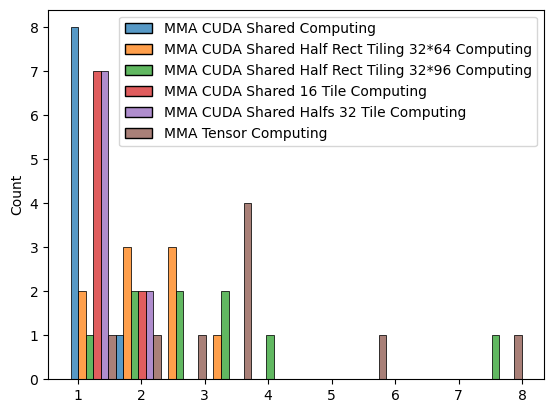

In [ ]:
import matplotlib.pyplot as plt
method_values
speed_up = dict()

for i,m in enumerate(mat_size):
    speed_up[m] = dict()
    
    for k in method_values:
        speed_up[m][k] = relative[i]/method_values[k][i]

data = speed_up
sizes = list(data.keys())
methods = list(data[sizes[0]].keys())

ploting_values = {method: [data[size][method] for size in sizes if data[size][method]] for method in methods}
ploting_values

df = pd.DataFrame(ploting_values, index=mat_size)
df.to_excel('wtf.xlsx')
g = sns.histplot(data = df, multiple='dodge')


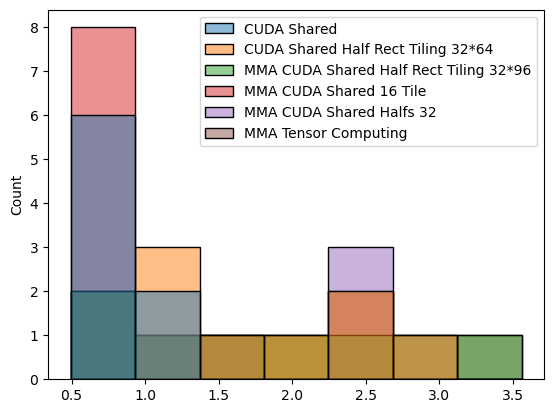

In [ ]:

for method in ploting_values:
    values = ploting_values[method]

    # Create histogram
g = sns.histplot(ploting_values, kde=False)






plt.savefig('/Users/johncarlsson/Desktop/HPC/HPC-Project-Template/figures/Tot_time')

In [142]:
df = pd.read_csv('/Users/johncarlsson/Desktop/HPC/HPC-Project-Template/stats.csv')
df.to_excel('stats.xlsx', index=mat_size)